Problem statement 3:
Perform the following operations using Python
1. Scan all variables for missing values and inconsistencies. If there are missing values and/or
inconsistencies, use the following techniques to deal with them.
a)Delete rows or column b)replace missing values with mean c)replace missing values with
mode d)replace missing values with median
2. Apply data transformations on at least one of the variables. The purpose of this transformation
should be one of the following reasons: to change the scale for better understanding of the
variable, to convert a non-linear relation into a linear one, or to decrease the skewness and
convert the distribution into a normal distribution

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv('train.csv')
df.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [4]:
# checking for inconsistencies
df['Sex'].value_counts()

male      577
female    314
Name: Sex, dtype: int64

In [5]:
# Deleting rows with missing values
data_wo_missing_rows=df.dropna(axis=0)
data_wo_missing_rows.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S
11,12,1,1,"Bonnell, Miss. Elizabeth",female,58.0,0,0,113783,26.5500,C103,S


In [6]:
print(df.shape)
print(data_wo_missing_rows.shape)

(891, 12)
(183, 12)


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
df['Age'].isnull().sum()

177

In [10]:
# Replacing missing values with mean
df['Age'].fillna(df['Age'].mean(),inplace=True)

In [11]:
df['Age'].isnull().sum()

0

In [15]:
#Replacing missing values with mode
df['Cabin'].fillna(df['Cabin'].mode()[0],inplace=True)

In [16]:
df['Cabin'].isnull().sum()

0

In [20]:
#Replacing missing values with median
df['Embarked'].fillna(df['Embarked'].mode()[0],inplace=True)

In [21]:
df['Embarked'].isnull().sum()

0

In [24]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [25]:
df = pd.DataFrame(housing.data, columns=housing.feature_names)

In [26]:
df.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


In [32]:
variable=df['AveRooms']

In [33]:
#Applied logarithmic transformation
transformed_variable=np.log(variable)

In [34]:
import matplotlib.pyplot as plt

Text(0.5, 1.0, 'After trans')

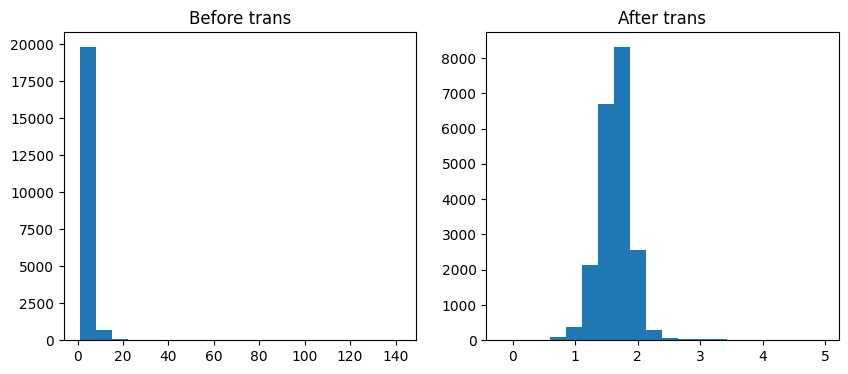

In [35]:
# Plot the histograms before and after transformation
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(variable, bins=20)
plt.title("Before trans")
plt.subplot(1,2,2)
plt.hist(transformed_variable, bins=20)
plt.title("After trans")

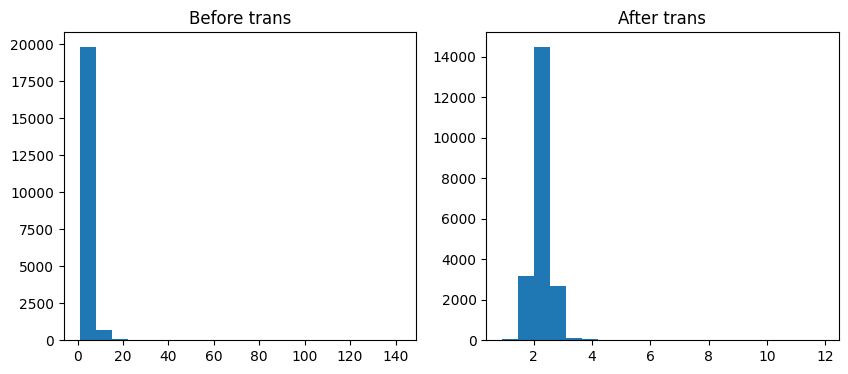

In [36]:
# Apply square root transformation
transformed_variable = np.sqrt(variable)
# Plot the histograms before and after transformation
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(variable, bins=20)
plt.title("Before trans")
plt.subplot(1,2,2)
plt.hist(transformed_variable, bins=20)
plt.title("After trans")
plt.show()

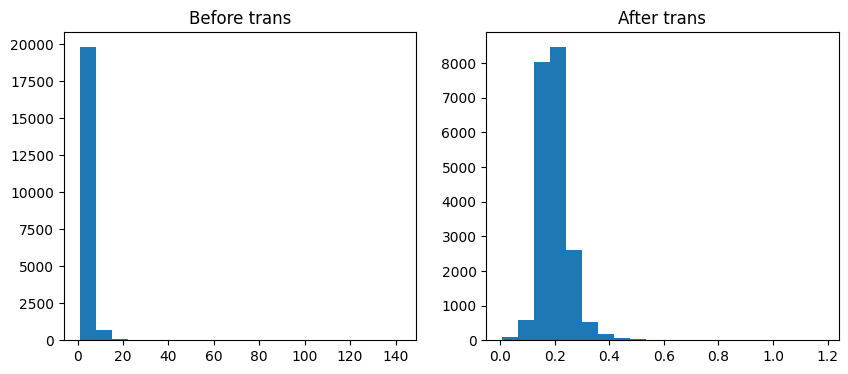

In [37]:
# Apply reciprocal transformation
transformed_variable = 1/variable
# Plot the histograms before and after transformation
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.hist(variable, bins=20)
plt.title("Before trans")
plt.subplot(1,2,2)
plt.hist(transformed_variable, bins=20)
plt.title("After trans")
plt.show()

Logarithmic Transformation: The logarithmic transformation involves taking the logarithm of the variable. 
    It is useful for reducing the skewness of highly positively skewed variables and 
    can help linearize the relationship between variables.

Square Root Transformation: The square root transformation involves taking the square root of the variable. 
    It can be useful for reducing the skewness of variables and stabilizing the variance.

Exponential Transformation: The exponential transformation involves taking the exponent of the variable. It is useful for variables with multiplicative relationships or when the data follows an exponential distribution.

Reciprocal Transformation: The reciprocal transformation involves taking the reciprocal (1/x) of the variable. It can be useful for variables that have a relationship with the dependent variable that is better explained by the inverse.

Square Transformation: The square transformation involves squaring the variable. It can help to emphasize differences in lower values and reduce the influence of extreme values.

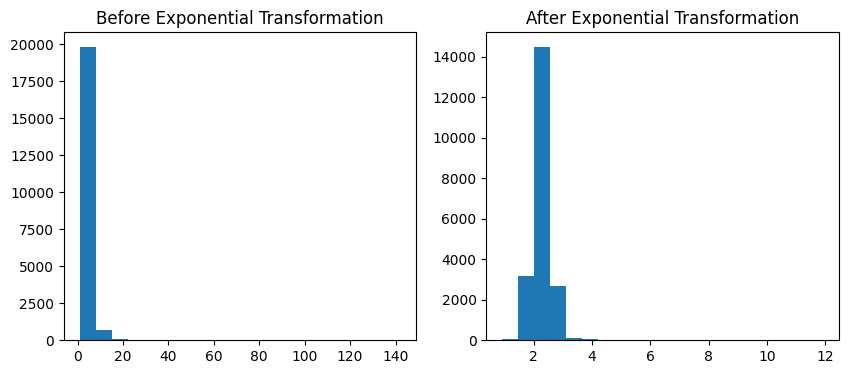

In [38]:
# Apply Exponenetial transformation
transformed_variable = np.sqrt(variable)

# Plot the histograms before and after transformation
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
plt.hist(variable, bins=20)
plt.title('Before Exponential Transformation')
plt.subplot(1, 2, 2)
plt.hist(transformed_variable, bins=20)
plt.title('After Exponential Transformation')
plt.show()

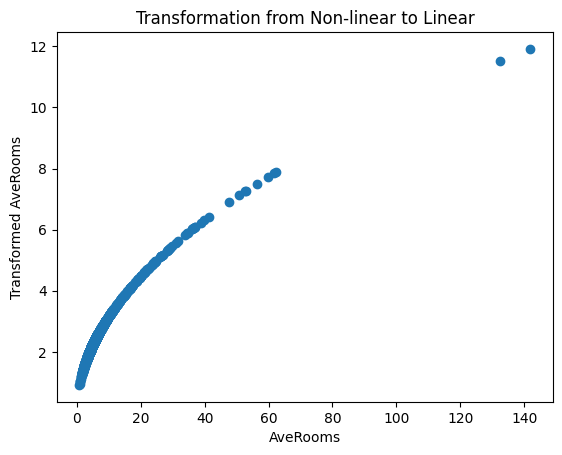

In [39]:
#creating scatter plot
plt.scatter(variable,transformed_variable)
plt.xlabel('AveRooms')
plt.ylabel('Transformed AveRooms')
plt.title('Transformation from Non-linear to Linear')
plt.show()

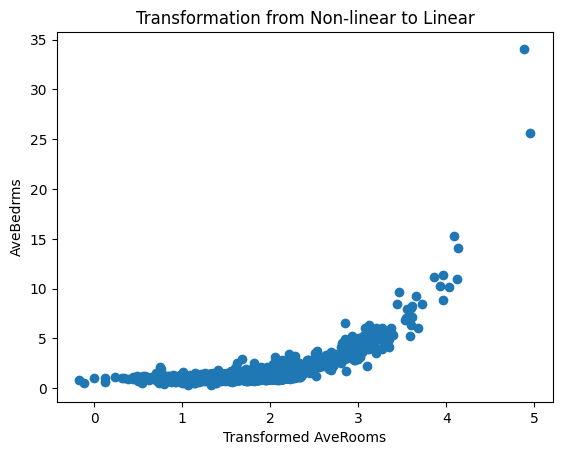

In [40]:
# Select the predictor variable with skewness
predictor = df['AveRooms']

# Select the target variable
target = df['AveBedrms']

# Apply logarithmic transformation to the predictor variable
transformed_predictor = np.log(predictor)

# Create a scatter plot
plt.scatter(transformed_predictor, target)
plt.xlabel('Transformed AveRooms')
plt.ylabel('AveBedrms')
plt.title('Transformation from Non-linear to Linear')
plt.show()